In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/Java/docs')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs


In [24]:
df = pd.read_csv("../output/LogVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
0,Gaussian,0.2,0.20,-1.609440,2.049150e-135,-1.589510e-134,3.479120e-135,0.940911,4.591720e+134,-0.038260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gaussian,0.2,0.25,-1.386290,3.588110e-116,-3.807490e-115,5.906680e-116,0.864870,2.410380e+115,-0.097392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gaussian,0.2,0.35,-1.049820,3.590780e-87,-5.006070e-86,5.681650e-87,0.745265,2.075490e+86,-0.127067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Gaussian,0.2,0.50,-0.693147,1.540250e-56,-1.640420e-55,2.817860e-56,0.517280,3.358410e+55,-0.089138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gaussian,0.2,0.75,-0.287682,7.637460e-22,-7.405910e-21,1.791570e-21,0.306194,4.009110e+20,-0.038885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.2]

# Deviation vs Uncertainty

In [26]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sorted(df['Noise'].unique()), noiseType='Uniform',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=True, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('log(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

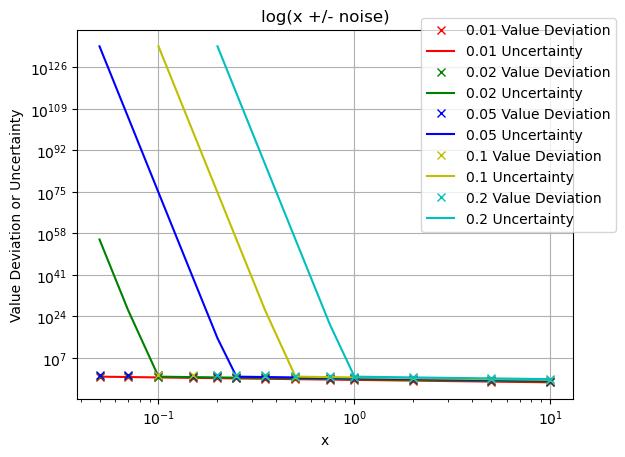

In [27]:
PlotValues()

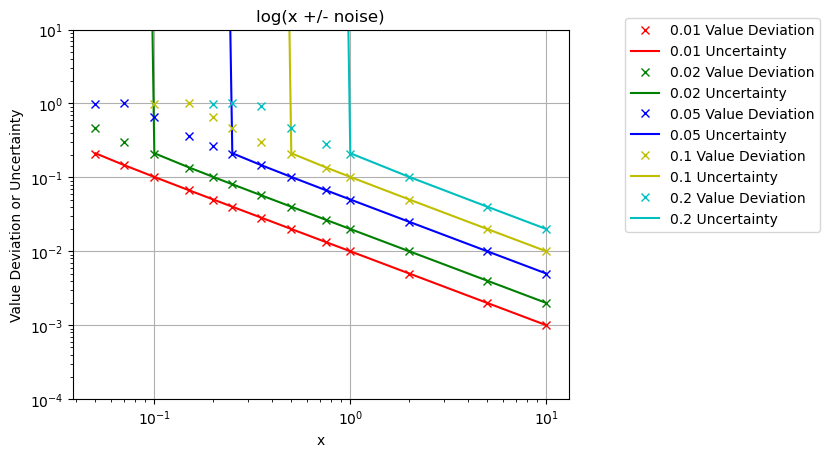

In [28]:
PlotValues(ylim=[1e-4, 1e1])

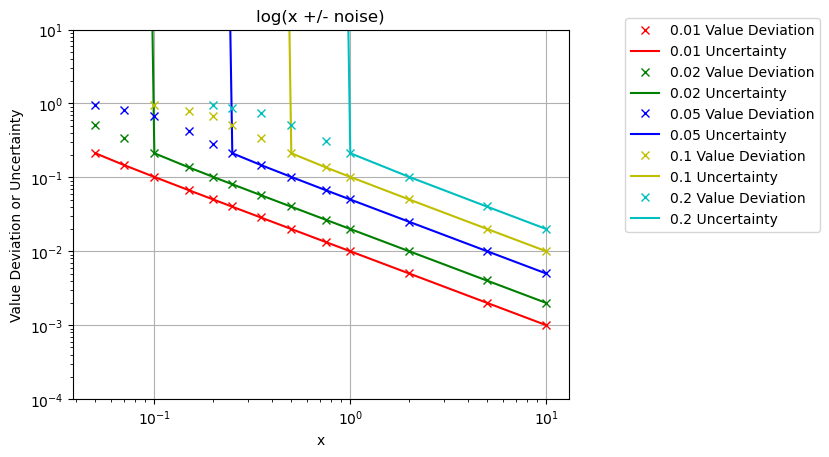

In [29]:
PlotValues(ylim=[1e-4, 1e1], noiseType='Gaussian')

In [30]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-4, 1e1])
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_xscale('log')
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.55, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

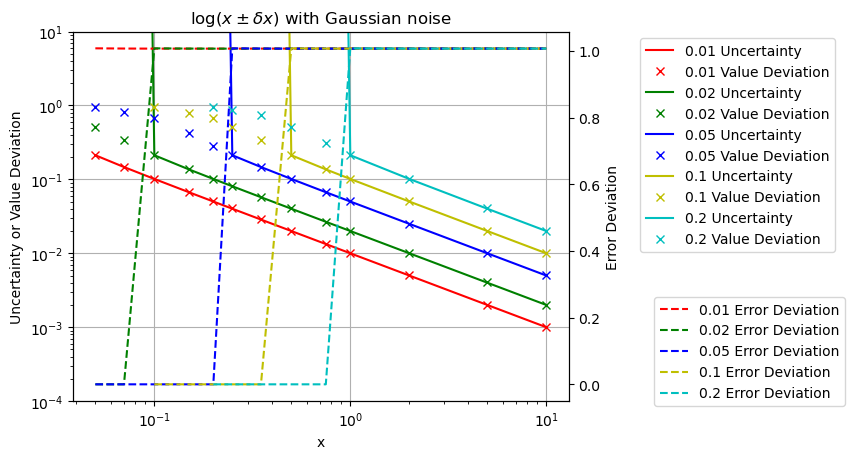

In [31]:
PlotErrorDev()

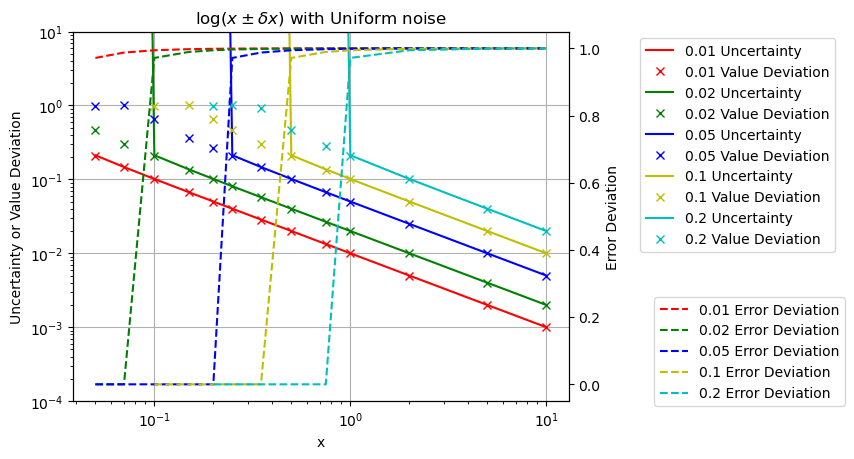

In [32]:
PlotErrorDev('Uniform')

# Mean vs Bias 

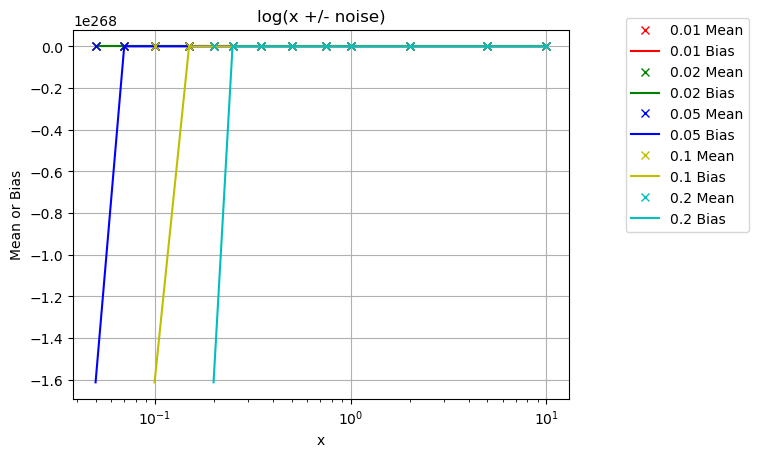

In [33]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

# Error Maximum and Minimum

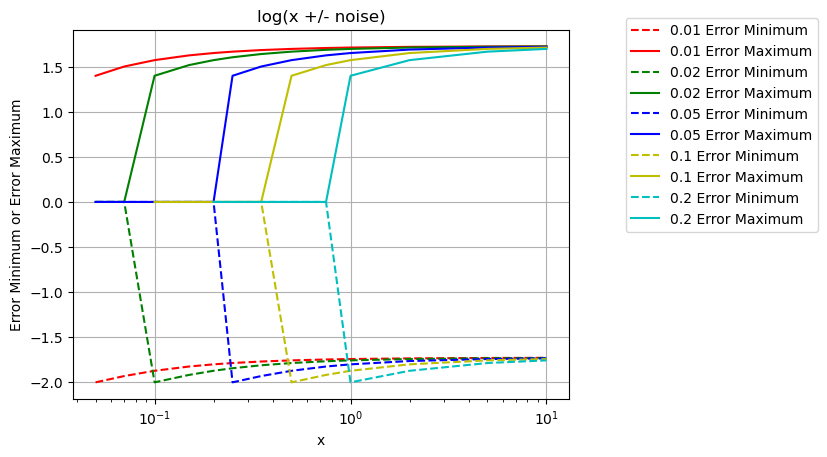

In [34]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [35]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.003313,0.005206,0.005088,0.006035,0.007691,0.009230,0.010295,0.013608,0.017631,0.024021,...,0.040350,0.012780,0.001657,0.000355,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.004348,0.003568,0.005129,0.005463,0.006355,0.009923,0.010481,0.013937,0.017951,0.021296,...,0.040250,0.012042,0.002007,0.000334,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.002616,0.003453,0.003139,0.003977,0.006069,0.007325,0.007848,0.011302,0.016011,0.020301,...,0.033382,0.010674,0.001360,0.000314,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.002930,0.004042,0.003739,0.005053,0.006669,0.008488,0.011015,0.011520,0.014652,0.020412,...,0.040521,0.017078,0.006973,0.001112,0.000303,0.000000,0.000000,0.0,0.0,0.0
4,0.002906,0.003407,0.003307,0.005211,0.007816,0.010021,0.013128,0.014430,0.018739,0.025554,...,0.044393,0.029462,0.014931,0.007616,0.003006,0.000601,0.000401,0.0,0.0,0.0


In [36]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


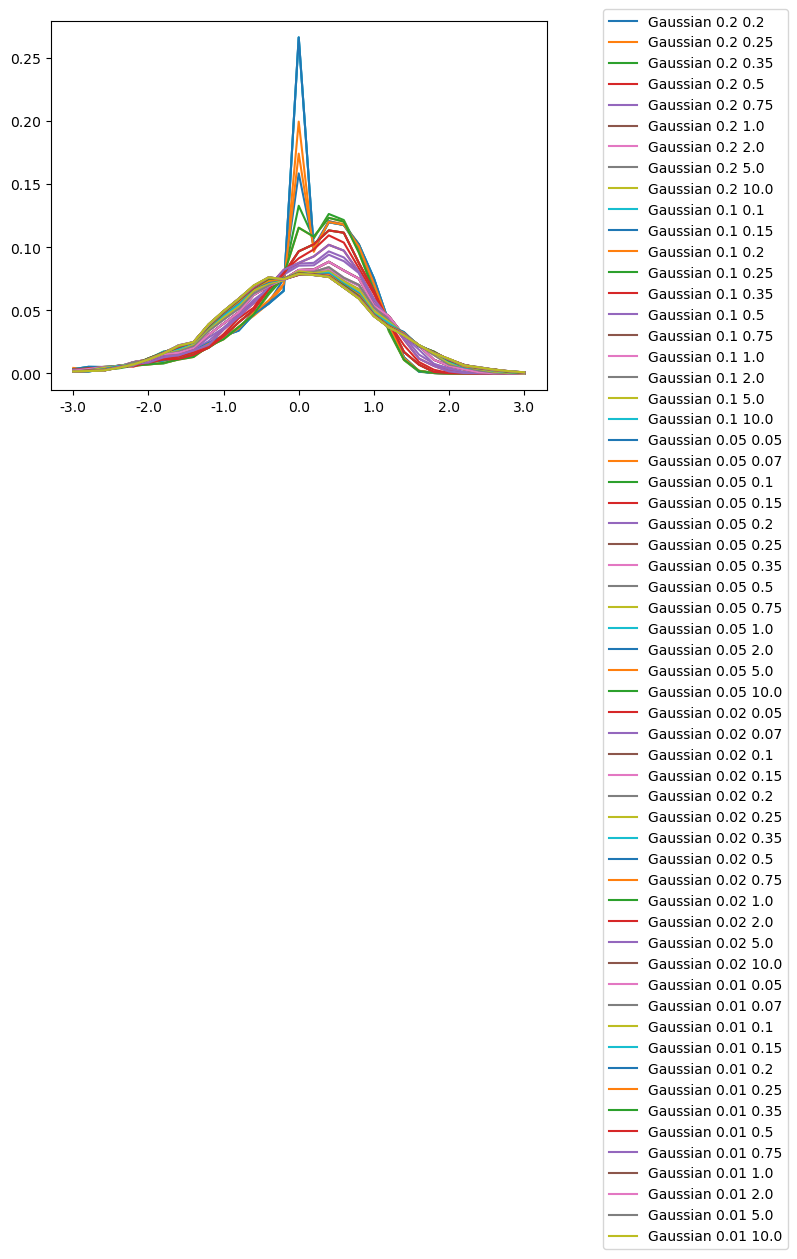

In [37]:
PlotHisto(sNoiseType=['Gaussian'])

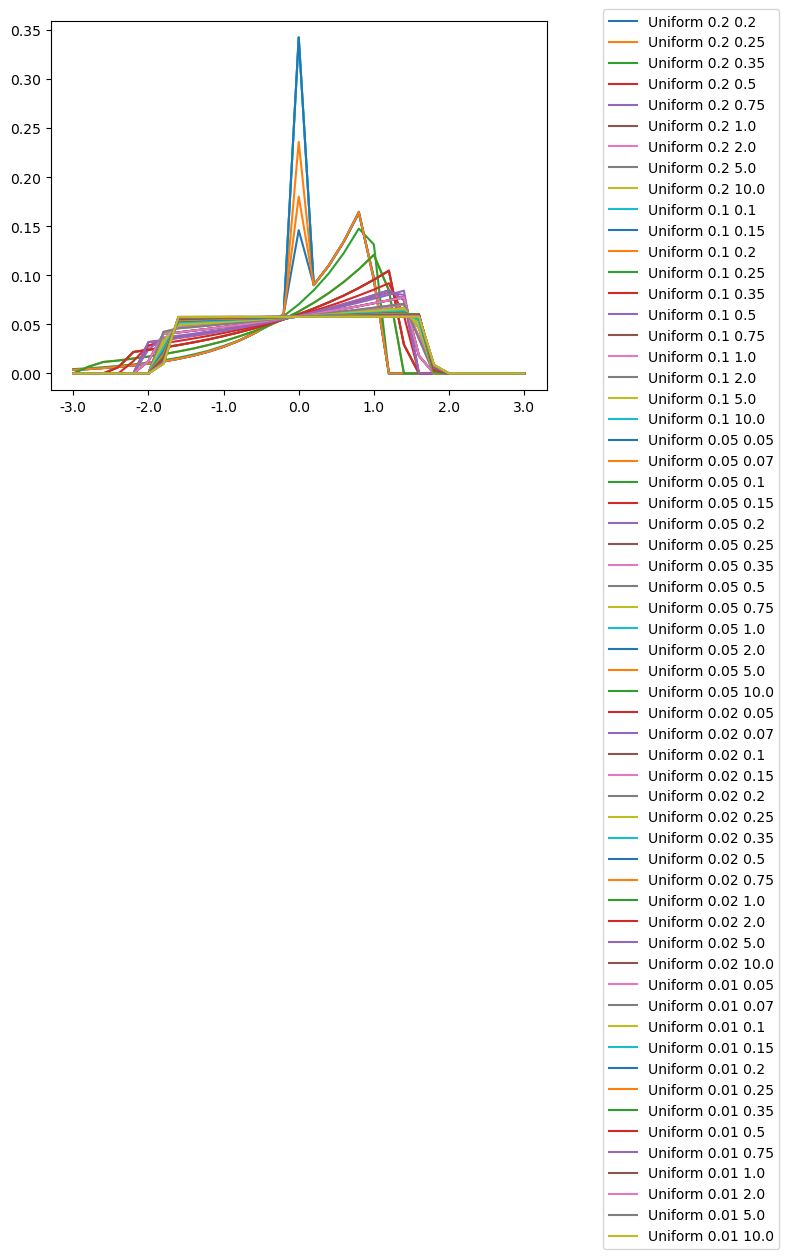

In [38]:
PlotHisto()

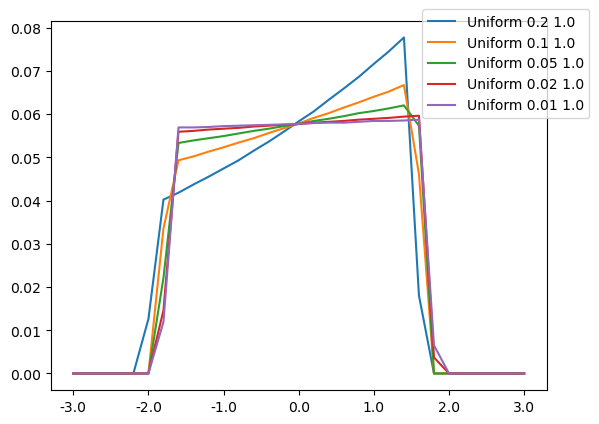

In [39]:
PlotHisto(sX=[1])

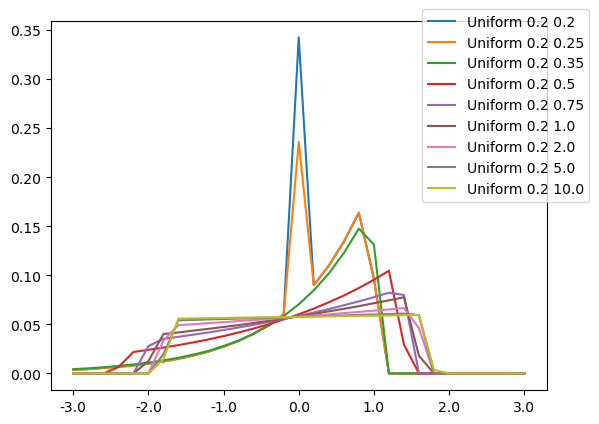

In [40]:
PlotHisto(sNoise=[0.2])

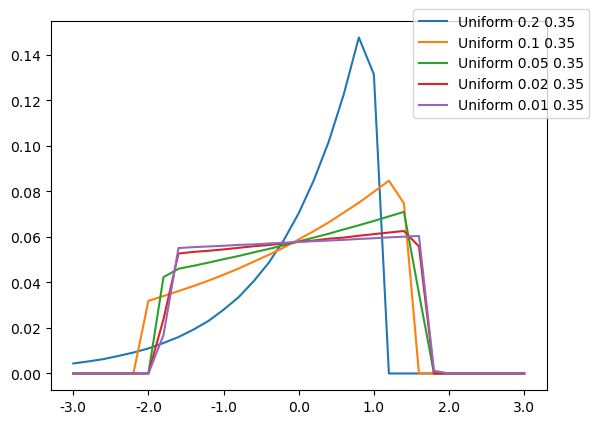

In [41]:
PlotHisto(sX=[0.35])